Demo to Gega Darakhvelidze


Running DBSCAN on Circles dataset (eps=0.2, min_pts=5)

Running DBSCAN on Blobs dataset (eps=0.5, min_pts=5)

Running DBSCAN on Moons dataset (eps=0.2, min_pts=5)


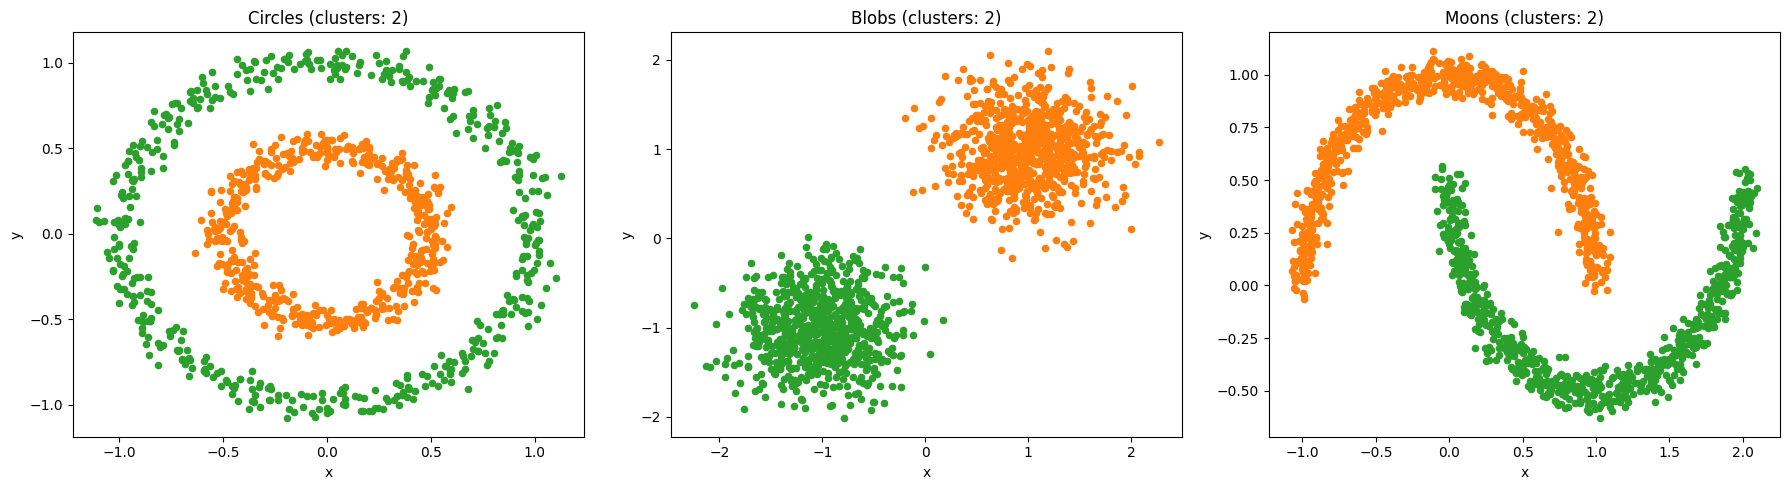

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def region_query(X, i, eps):
    distances = np.linalg.norm(X - X[i], axis=1)
    return list(np.where(distances <= eps)[0])

def expand_cluster_core(i, labels, visited, neighbors_list, cluster_id, is_core):
    labels[i] = cluster_id
    seed_set = list(neighbors_list[i])
    while seed_set:
        j = seed_set.pop(0)
        if not visited[j]:
            visited[j] = True
            if is_core[j]:
                seed_set.extend(neighbors_list[j])
        if labels[j] in [0, -1]:
            labels[j] = cluster_id

def dbscan_core_first(X, eps, min_pts):
    n = len(X)
    labels = np.zeros(n, dtype=int)      
    visited = np.zeros(n, dtype=bool)    
    is_core = np.zeros(n, dtype=bool)    
    neighbors_list = [None] * n          

    #define core and noise points
    for i in range(n):
        neighbors = region_query(X, i, eps)
        neighbors_list[i] = neighbors
        if len(neighbors) >= min_pts:
            is_core[i] = True
        else:
            labels[i] = -1   
            # visited[i] = True

    #expand clusters
    cluster_id = 0
    for i in range(n):
        if is_core[i] and not visited[i]:
            cluster_id += 1
            visited[i] = True
            expand_cluster_core(i, labels, visited, neighbors_list, cluster_id, is_core)

    return labels

# load datasets
df_circle = pd.read_csv("circle.csv")
df_blobs = pd.read_csv("blobs.csv")
df_moons = pd.read_csv("moons.csv")

X_circle = df_circle[['Xcircle_X1', 'Xcircle_X2']].values
X_blobs  = df_blobs[['Xblobs_X1', 'Xblobs_X2']].values   
X_moons  = df_moons[['Xmoons_X1', 'Xmoons_X2']].values   

datasets_list = [
    ("Circles", X_circle, 0.2, 5),
    ("Blobs", X_blobs, 0.5, 5),
    ("Moons", X_moons, 0.2, 5)
]

plt.figure(figsize=(18, 5))
for idx, (name, X, eps, min_pts) in enumerate(datasets_list):

    print(f"\nRunning DBSCAN on {name} dataset (eps={eps}, min_pts={min_pts})")
    labels = dbscan_core_first(X, eps, min_pts)
    unique_labels = np.unique(labels)
    
    colors = { -1: "black" }
    cmap = plt.get_cmap("tab10")
    for k in unique_labels:
        if k != -1:
            colors[k] = cmap(int(k) % 10)
    
    plt.subplot(1, 3, idx+1)
    for i, point in enumerate(X):
        plt.scatter(point[0], point[1], color=colors.get(labels[i], "grey"), s=20)
    plt.title(f"{name} (clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)})")
    plt.xlabel("x")
    plt.ylabel("y")
plt.tight_layout()
plt.show()